In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_absolute_error, mean_squared_error, r2_score

In [3]:
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
from sklearn.pipeline import Pipeline

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [6]:
df = pd.read_csv('/content/Credit_Score_Clean_Dataset.csv.zip')

In [7]:
df.head()

,id,customer_id,month,age,ssn,occupation,annual_income,monthly_inhand_salary,num_bank_accounts,num_credit_card,...,num_credit_inquiries,credit_mix,outstanding_debt,credit_utilization_ratio,payment_of_min_amount,total_emi_per_month,amount_invested_monthly,payment_behaviour,monthly_balance,credit_score
0,0x1602,CUS_0xd40,January,23.0,821-00-0265,Scientist,19114.12,1824.843333,3,4,...,4.0,Standard,809.98,26.822620,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
1,0x1605,CUS_0xd40,April,23.0,821-00-0265,Scientist,19114.12,3088.874167,3,4,...,4.0,Good,809.98,31.377862,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good
2,0x1606,CUS_0xd40,May,23.0,821-00-0265,Scientist,19114.12,1824.843333,3,4,...,4.0,Good,809.98,24.797347,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good
3,0x1607,CUS_0xd40,June,23.0,821-00-0265,Scientist,19114.12,3088.874167,3,4,...,4.0,Good,809.98,27.262259,No,49.574949,62.430172,Low_spent_Medium_value_payments,340.479212,Good
4,0x1608,CUS_0xd40,July,23.0,821-00-0265,Scientist,19114.12,1824.843333,3,4,...,4.0,Good,809.98,22.537593,No,49.574949,178.344067,Low_spent_Small_value_payments,244.565317,Good


In [8]:
print(f'Dataset has {df.shape[0]} rows and {df.shape[1]} columns')

Dataset has 97078 rows and 25 columns


In [9]:
numerical_features = df.select_dtypes(include=np.number).columns.tolist()
print("Numerical Features:", numerical_features)

Numerical Features: ['age', 'annual_income', 'monthly_inhand_salary', 'num_bank_accounts', 'num_credit_card', 'interest_rate', 'num_of_loan', 'delay_from_due_date', 'num_of_delayed_payment', 'changed_credit_limit', 'num_credit_inquiries', 'outstanding_debt', 'credit_utilization_ratio', 'total_emi_per_month', 'amount_invested_monthly', 'monthly_balance']


In [10]:
categorical_features = df.select_dtypes(include=['object']).columns.tolist()
print("Categorical Features:", categorical_features)

Categorical Features: ['id', 'customer_id', 'month', 'ssn', 'occupation', 'credit_mix', 'payment_of_min_amount', 'payment_behaviour', 'credit_score']


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97078 entries, 0 to 97077
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        97078 non-null  object 
 1   customer_id               97078 non-null  object 
 2   month                     97078 non-null  object 
 3   age                       97078 non-null  float64
 4   ssn                       97078 non-null  object 
 5   occupation                97078 non-null  object 
 6   annual_income             97078 non-null  float64
 7   monthly_inhand_salary     97078 non-null  float64
 8   num_bank_accounts         97078 non-null  int64  
 9   num_credit_card           97078 non-null  int64  
 10  interest_rate             97078 non-null  int64  
 11  num_of_loan               97078 non-null  float64
 12  delay_from_due_date       97078 non-null  int64  
 13  num_of_delayed_payment    97078 non-null  float64
 14  change

In [12]:
df.isnull().sum()

,0
id,0
customer_id,0
month,0
age,0
ssn,0
occupation,0
annual_income,0
monthly_inhand_salary,0
num_bank_accounts,0
num_credit_card,0


In [13]:
df.describe()

,age,annual_income,monthly_inhand_salary,num_bank_accounts,num_credit_card,interest_rate,num_of_loan,delay_from_due_date,num_of_delayed_payment,changed_credit_limit,num_credit_inquiries,outstanding_debt,credit_utilization_ratio,total_emi_per_month,amount_invested_monthly,monthly_balance
count,97078.000000,9.707800e+04,97078.000000,97078.000000,97078.000000,97078.000000,97078.000000,97078.000000,97078.000000,97078.000000,97078.000000,97078.000000,97078.000000,97078.000000,97078.000000,97078.000000
mean,119.371753,1.753469e+05,4029.809684,17.071891,22.437267,72.536908,10.785842,21.106450,29.939749,10.477937,27.288109,1429.367986,32.277994,1407.587606,616.420533,400.855854
std,684.907739,1.423108e+06,2967.685320,117.105013,128.884655,467.644615,61.795195,14.880737,219.239670,6.673437,190.799527,1156.750907,5.112190,8314.496393,2003.539538,211.964670
min,14.000000,7.005930e+03,303.645417,-1.000000,0.000000,1.000000,0.000000,-5.000000,-3.000000,0.000000,0.000000,0.230000,20.000000,0.000000,0.000000,0.007760
25%,25.000000,1.942431e+04,1780.378333,3.000000,4.000000,8.000000,2.000000,10.000000,9.000000,5.360000,3.000000,566.980000,28.048091,30.784138,76.759120,270.639000
50%,33.000000,3.748298e+04,3088.874167,6.000000,6.000000,14.000000,3.000000,18.000000,14.000000,9.410000,6.000000,1168.515000,32.299010,69.602920,135.672063,336.166332
75%,42.000000,7.263748e+04,5385.466667,7.000000,7.000000,20.000000,6.000000,28.000000,18.000000,14.900000,9.000000,1953.630000,36.487680,162.030165,255.338134,466.488577
max,8698.000000,2.419806e+07,15204.633333,1798.000000,1499.000000,5797.000000,1496.000000,67.000000,4397.000000,36.970000,2597.000000,4998.070000,50.000000,82331.000000,10000.000000,1602.040519


In [14]:
df['occupation'].unique()

array(['Scientist', 'Teacher', 'Engineer', 'Entrepreneur', 'Developer',
       'Lawyer', 'Media_Manager', 'Doctor', 'Journalist', 'Manager',
       'Accountant', 'Musician', 'Mechanic', 'Writer', 'Architect'],
      dtype=object)

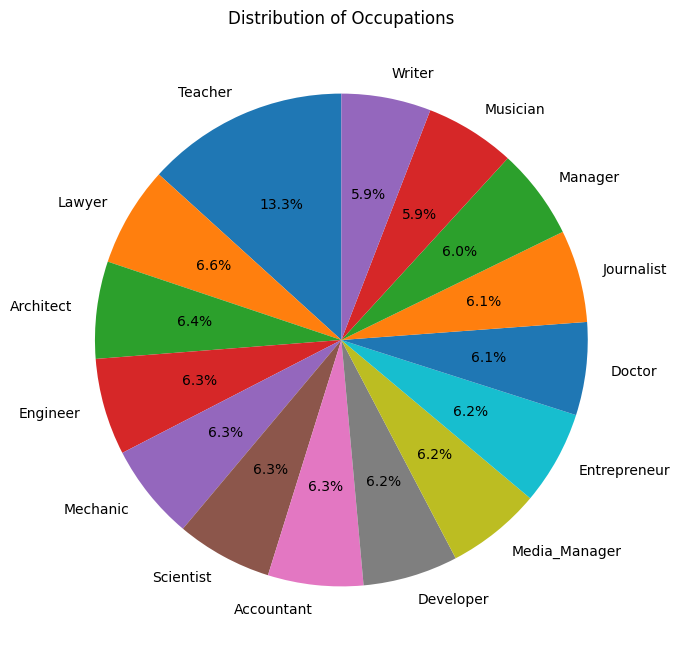

In [15]:
occupation_counts = df['occupation'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(occupation_counts, labels=occupation_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Occupations')
plt.show()

In [16]:
df['credit_mix'].unique()

array(['Standard', 'Good', 'Bad'], dtype=object)

In [17]:
df['payment_of_min_amount'].unique()

array(['No', 'Yes'], dtype=object)

In [18]:
df['payment_behaviour'].unique()

array(['High_spent_Small_value_payments',
       'Low_spent_Small_value_payments',
       'High_spent_Medium_value_payments',
       'Low_spent_Medium_value_payments',
       'High_spent_Large_value_payments',
       'Low_spent_Large_value_payments'], dtype=object)

In [19]:
df['credit_score'].unique()

array(['Good', 'Standard', 'Poor'], dtype=object)

In [20]:
df['credit_score'].value_counts()

,count
credit_score,
Standard,51611
Poor,28194
Good,17273


In [21]:
df['credit_score'] = df['credit_score'].apply(lambda x: 1 if x in ['Good', 'Standard'] else 0)

print(df['credit_score'].value_counts())

credit_score
1    68884
0    28194
Name: count, dtype: int64


In [22]:
df.sample(5)

,id,customer_id,month,age,ssn,occupation,annual_income,monthly_inhand_salary,num_bank_accounts,num_credit_card,...,num_credit_inquiries,credit_mix,outstanding_debt,credit_utilization_ratio,payment_of_min_amount,total_emi_per_month,amount_invested_monthly,payment_behaviour,monthly_balance,credit_score
30206,0xcc22,CUS_0x34b5,May,46.0,370-04-7463,Teacher,139383.60,11618.300000,4,6,...,5.0,Standard,1132.10,37.059512,No,163.129457,287.034992,High_spent_Large_value_payments,951.665551,1
22587,0x9e1b,CUS_0x1647,June,19.0,#F%$D@*&8,Lawyer,28608.65,2490.054167,4,7,...,4.0,Good,143.04,26.716281,No,23.008446,274.307170,Low_spent_Small_value_payments,241.689800,1
94225,0x24ebe,CUS_0x5494,January,54.0,238-73-8927,Accountant,22332.37,1907.030833,8,4,...,2.0,Good,1154.50,24.072215,No,14.231962,16.149296,High_spent_Large_value_payments,400.321824,0
52562,0x15337,CUS_0x8980,February,1689.0,729-65-2462,Engineer,74766.86,6025.571667,4,7,...,1.0,Standard,107.57,37.958757,No,153.394994,379.600962,Low_spent_Small_value_payments,359.561211,0
69269,0x1b801,CUS_0x31ce,April,35.0,854-78-1111,Developer,16864.18,1474.348333,5,4,...,6.0,Standard,262.98,29.741983,Yes,44.271842,44.624022,Low_spent_Medium_value_payments,308.538970,1


In [23]:
categorical_cols = ['occupation', 'credit_mix', 'payment_of_min_amount', 'payment_behaviour', 'credit_score']

In [24]:
label_enc = LabelEncoder()
for col in categorical_cols:
    df[col] = label_enc.fit_transform(df[col])

In [25]:
X1 = df[['occupation', 'credit_mix', 'payment_of_min_amount', 'payment_behaviour']]
y1 = df['credit_score']

In [26]:
chi_scores = chi2(X1, y1)
chi2_scores = pd.DataFrame({"Feature": X1.columns, "Score": chi_scores[0]})
print(chi2_scores.sort_values(by="Score", ascending=False))

                 Feature        Score
2  payment_of_min_amount  2764.205646
1             credit_mix  2528.194697
3      payment_behaviour  1107.275340
0             occupation     8.492205


In [27]:
X_num_for_f_test = df[['age', 'annual_income', 'num_bank_accounts', 'num_credit_card', 'interest_rate', 'num_of_loan', 'delay_from_due_date', 'num_of_delayed_payment', 'changed_credit_limit', 'num_credit_inquiries', 'outstanding_debt', 'credit_utilization_ratio', 'total_emi_per_month', 'amount_invested_monthly', 'monthly_balance']]

In [28]:
y_for_f_test = df['credit_score']

In [29]:
f_scores, p_values = f_classif(X_num_for_f_test, y_for_f_test)
f_scores_df = pd.DataFrame({'Feature': X_num_for_f_test.columns, 'F-Score': f_scores})
print(f_scores_df.sort_values(by='F-Score', ascending=False))

                     Feature       F-Score
6        delay_from_due_date  15631.110344
10          outstanding_debt  14676.118907
14           monthly_balance   2834.446524
8       changed_credit_limit    382.189534
11  credit_utilization_ratio    128.410602
9       num_credit_inquiries      8.689957
2          num_bank_accounts      7.766089
1              annual_income      7.337695
3            num_credit_card      5.451057
13   amount_invested_monthly      4.745222
5                num_of_loan      3.709109
4              interest_rate      1.765793
7     num_of_delayed_payment      0.923178
12       total_emi_per_month      0.814550
0                        age      0.703894


In [30]:
selected_features = [
    'credit_mix', 'payment_of_min_amount', 'payment_behaviour',
    'delay_from_due_date', 'interest_rate', 'num_credit_card',
    'num_bank_accounts', 'changed_credit_limit', 'num_credit_inquiries',
    'num_of_loan', 'outstanding_debt', 'occupation'
]

In [31]:
x = df[selected_features]
y = df['credit_score']

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [33]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [34]:
models = [
    ('Random Forest', RandomForestClassifier(random_state=42))
]

best_model = None
best_accuracy = 0.0

for name, model in models:
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('model', model)
    ])

    scores = cross_val_score(pipeline, x_train, y_train, cv=5)

    mean_accuracy = scores.mean()

    pipeline.fit(x_train, y_train)

    y_pred = pipeline.predict(x_test)

    accuracy = accuracy_score(y_test, y_pred)

    print("Model:", name)
    print("Cross-validation Accuracy:", mean_accuracy)
    print("Test Accuracy:", accuracy)
    print()

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = pipeline

print("Best Model:", best_model)

Model: Random Forest
Cross-validation Accuracy: 0.8634112907640722
Test Accuracy: 0.8687726307903608

Best Model: Pipeline(steps=[('scaler', StandardScaler()),
                ('model', RandomForestClassifier(random_state=42))])


In [35]:
models = [
    ('Gradient Boosting', GradientBoostingClassifier(random_state=42))
]

best_model = None
best_accuracy = 0.0

for name, model in models:
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('model', model)
    ])

    scores = cross_val_score(pipeline, x_train, y_train, cv=5)

    mean_accuracy = scores.mean()

    pipeline.fit(x_train, y_train)

    y_pred = pipeline.predict(x_test)

    accuracy = accuracy_score(y_test, y_pred)

    print("Model:", name)
    print("Cross-validation Accuracy:", mean_accuracy)
    print("Test Accuracy:", accuracy)
    print()

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = pipeline

print("Best Model:", best_model)

Model: Gradient Boosting
Cross-validation Accuracy: 0.8261276976191241
Test Accuracy: 0.8279747783743289

Best Model: Pipeline(steps=[('scaler', StandardScaler()),
                ('model', GradientBoostingClassifier(random_state=42))])


In [36]:
models = [
    ('Support Vector Machine', SVC(random_state=42))
]

best_model = None
best_accuracy = 0.0

for name, model in models:
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('model', model)
    ])

    scores = cross_val_score(pipeline, x_train, y_train, cv=5)

    mean_accuracy = scores.mean()

    pipeline.fit(x_train, y_train)

    y_pred = pipeline.predict(x_test)

    accuracy = accuracy_score(y_test, y_pred)

    print("Model:", name)
    print("Cross-validation Accuracy:", mean_accuracy)
    print("Test Accuracy:", accuracy)
    print()

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = pipeline

print("Best Model:", best_model)

Model: Support Vector Machine
Cross-validation Accuracy: 0.7986531653693815
Test Accuracy: 0.7988825071794231

Best Model: Pipeline(steps=[('scaler', StandardScaler()), ('model', SVC(random_state=42))])


In [37]:
models = [
    ('Logistic Regression', LogisticRegression(random_state=42))
]

best_model = None
best_accuracy = 0.0

for name, model in models:
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('model', model)
    ])

    scores = cross_val_score(pipeline, x_train, y_train, cv=5)

    mean_accuracy = scores.mean()

    pipeline.fit(x_train, y_train)

    y_pred = pipeline.predict(x_test)

    accuracy = accuracy_score(y_test, y_pred)

    print("Model:", name)
    print("Cross-validation Accuracy:", mean_accuracy)
    print("Test Accuracy:", accuracy)
    print()

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = pipeline

print("Best Model:", best_model)

Model: Logistic Regression
Cross-validation Accuracy: 0.7601242592293707
Test Accuracy: 0.7610188537894869

Best Model: Pipeline(steps=[('scaler', StandardScaler()),
                ('model', LogisticRegression(random_state=42))])


In [38]:
models = [
    ('K-Nearest Neighbors', KNeighborsClassifier())
]

best_model = None
best_accuracy = 0.0

for name, model in models:
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('model', model)
    ])

    scores = cross_val_score(pipeline, x_train, y_train, cv=5)

    mean_accuracy = scores.mean()

    pipeline.fit(x_train, y_train)

    y_pred = pipeline.predict(x_test)

    accuracy = accuracy_score(y_test, y_pred)

    print("Model:", name)
    print("Cross-validation Accuracy:", mean_accuracy)
    print("Test Accuracy:", accuracy)
    print()

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = pipeline

print("Best Model:", best_model)

Model: K-Nearest Neighbors
Cross-validation Accuracy: 0.788413622624965
Test Accuracy: 0.7902047696341615

Best Model: Pipeline(steps=[('scaler', StandardScaler()),
                ('model', KNeighborsClassifier())])


In [39]:
models = [
    ('Decision Tree', DecisionTreeClassifier(random_state=42))
]

best_model = None
best_accuracy = 0.0

for name, model in models:
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('model', model)
    ])

    scores = cross_val_score(pipeline, x_train, y_train, cv=5)

    mean_accuracy = scores.mean()

    pipeline.fit(x_train, y_train)

    y_pred = pipeline.predict(x_test)

    accuracy = accuracy_score(y_test, y_pred)

    print("Model:", name)
    print("Cross-validation Accuracy:", mean_accuracy)
    print("Test Accuracy:", accuracy)
    print()

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = pipeline

print("Best Model:", best_model)

Model: Decision Tree
Cross-validation Accuracy: 0.809615281245825
Test Accuracy: 0.8117430390810338

Best Model: Pipeline(steps=[('scaler', StandardScaler()),
                ('model', DecisionTreeClassifier(random_state=42))])


In [40]:
models = [
    ('Ada Boost', AdaBoostClassifier(random_state=42))
]

best_model = None
best_accuracy = 0.0

for name, model in models:
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('model', model)
    ])

    scores = cross_val_score(pipeline, x_train, y_train, cv=5)

    mean_accuracy = scores.mean()

    pipeline.fit(x_train, y_train)

    y_pred = pipeline.predict(x_test)

    accuracy = accuracy_score(y_test, y_pred)

    print("Model:", name)
    print("Cross-validation Accuracy:", mean_accuracy)
    print("Test Accuracy:", accuracy)
    print()

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = pipeline

print("Best Model:", best_model)

Model: Ada Boost
Cross-validation Accuracy: 0.7871528694724261
Test Accuracy: 0.7857098264452491

Best Model: Pipeline(steps=[('scaler', StandardScaler()),
                ('model', AdaBoostClassifier(random_state=42))])


In [41]:
models = [
    ('Naive Bayes', GaussianNB())
]

best_model = None
best_accuracy = 0.0

for name, model in models:
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('model', model)
    ])

    scores = cross_val_score(pipeline, x_train, y_train, cv=5)

    mean_accuracy = scores.mean()

    pipeline.fit(x_train, y_train)

    y_pred = pipeline.predict(x_test)

    accuracy = accuracy_score(y_test, y_pred)

    print("Model:", name)
    print("Cross-validation Accuracy:", mean_accuracy)
    print("Test Accuracy:", accuracy)
    print()

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = pipeline

print("Best Model:", best_model)

Model: Naive Bayes
Cross-validation Accuracy: 0.7548969433310291
Test Accuracy: 0.752871769259583

Best Model: Pipeline(steps=[('scaler', StandardScaler()), ('model', GaussianNB())])


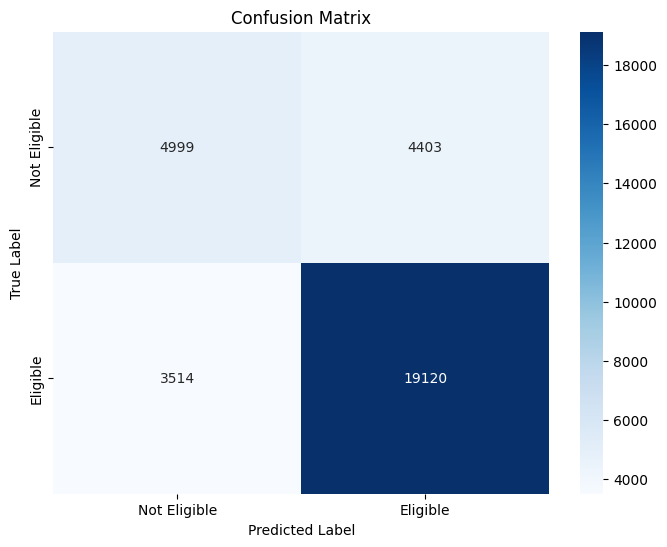

In [42]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Eligible', 'Eligible'],
            yticklabels=['Not Eligible', 'Eligible'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [43]:
import pickle
with open('01_credit_scoring_model.pkl', 'wb') as file:
    pickle.dump(best_model, file)
loaded_model = pickle.load(open('01_credit_scoring_model.pkl', 'rb'))

In [44]:
data = pd.DataFrame({
    'credit_mix': [2],
    'payment_of_min_amount': [1],
    'payment_behaviour': [0],
    'delay_from_due_date': [10],
    'interest_rate': [10.5],
    'num_credit_card': [3],
    'num_bank_accounts': [5],
    'changed_credit_limit': [1],
    'num_credit_inquiries': [2],
    'num_of_loan': [2],
    'outstanding_debt': [5000],
    'occupation': [2]
})

prediction = loaded_model.predict(data)

if prediction[0] == 1:
  print("User should be given a loan.")
else:
  print("User should not be given a loan.")

User should not be given a loan.
